In [12]:
from qiskit import QuantumCircuit, execute, IBMQ
from enum import Enum

In [13]:
class SimpleBinary(Enum):
    ZERO        = 0
    ONE         = 1
    SAME_AS     = 2
    OPPOSITE_OF = 3

In [14]:
def get_oracle(circ, function):
    # if function == SimpleBinary.ZERO:
    #     Do nothing
    if function == SimpleBinary.ONE:
        circ.x(1)
    elif function == SimpleBinary.SAME_AS:
        circ.cnot(0, 1)
    elif function == SimpleBinary.OPPOSITE_OF:
        circ.cnot(0, 1)
        circ.x(1)
    return circ

In [15]:
def get_function():
    print("Which function? (0/1/2/3)")
    print("0: ZERO")
    print("1: ONE")
    print("2: SAME_AS")
    print("3: OPPOSITE_OF")
    value = input(" > ")
    return SimpleBinary(int(value))

Which function? (0/1/2/3)
0: ZERO
1: ONE
2: SAME_AS
3: OPPOSITE_OF


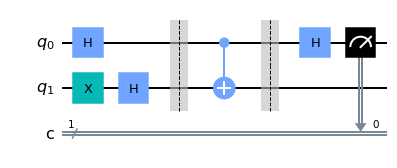

In [16]:
circ = QuantumCircuit(2, 1)
function = get_function()

circ.x(1)
circ.h(0)
circ.h(1)
circ.barrier()

circ = get_oracle(circ, function)
circ.barrier()
circ.h(0)
circ.measure(0, 0)
display(circ.draw('mpl'))

In [17]:
provider = IBMQ.load_account()
device = provider.get_backend('ibmq_qasm_simulator')
job = execute(circ, backend=device, shots=1, memory=True)
print(job.job_id())

shots = 1
result = job.result()
counts = result.get_counts(circ)

print(function)
print(counts)
number_of_0s = counts.get('0')
number_of_1s = counts.get('1')

if number_of_0s is not None and number_of_0s == shots:
    print('Constant')
elif number_of_1s is not None and number_of_1s == shots:
    print('Balanced')
else:
    print("Results aren't conclusive")

ibmqfactory.load_account:WARNING:2024-05-12 13:46:15,349: Credentials are already in use. The existing account in the session will be replaced.


cp05fdcqn6qbud5cjis0
SimpleBinary.SAME_AS
{'1': 1}
Balanced
